## 라이브러리 import

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

## 데이터 로드

In [27]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 데이터 확인

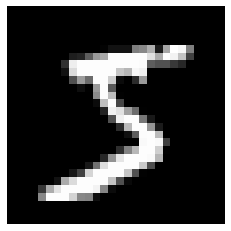

2
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  46  17  53  53  33   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  11 140 248 229 253 253 

In [28]:
# 임의의 데이터 확인
my_sample = np.random.randint(60000)
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

## 데이터 전처리

### one-hot encoding

In [29]:
# np_utils.to_categorical()을 사용해 one-hot encoding
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### reshape, scaling

In [30]:
# 모델에 적용하기 위해 차원 축소
# 나중에 그림 확인하기 위해 원본 데이터 보존
x_train = X_train.reshape(-1, 28 * 28)
x_test = X_test.reshape(-1, 28 * 28)
# minmax scaling
x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


## 모델 생성

In [31]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 399,498
Trainable params: 399,498
Non-trainable params: 0
_________________________________________________________________
None


## 모델 학습

In [32]:
fit_hist = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2211 - accuracy: 0.9339 - val_loss: 0.1464 - val_accuracy: 0.9553
Epoch 2/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1039 - accuracy: 0.9679 - val_loss: 0.1025 - val_accuracy: 0.9678
Epoch 3/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0773 - accuracy: 0.9763 - val_loss: 0.1116 - val_accuracy: 0.9703
Epoch 4/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0593 - accuracy: 0.9821 - val_loss: 0.1065 - val_accuracy: 0.9730
Epoch 5/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0504 - accuracy: 0.9849 - val_loss: 0.1041 - val_accuracy: 0.9741
Epoch 6/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.1073 - val_accuracy: 0.9745
Epoch 7/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0380 - accuracy: 0.9891 - val_loss: 0.1198 - val_accuracy:

## 학습 결과 확인

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy:', score[1])

Final test set accuracy: 0.9799000024795532


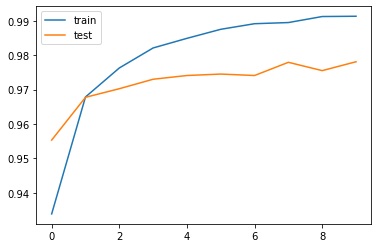

In [34]:
# train, test accuracy 확인
plt.plot(fit_hist.history['accuracy'], label='train')
plt.plot(fit_hist.history['val_accuracy'], label='test')
plt.legend(loc='best')
plt.show()

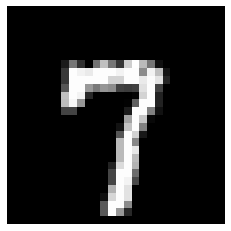

[[1.32602145e-33 6.73221039e-20 1.05507091e-15 6.10111461e-23
  2.80232082e-17 3.22850746e-30 7.63133366e-34 1.00000000e+00
  2.04222541e-20 1.20883807e-14]]
7
Target: 7
Prediction after learning: 7


In [49]:
# 임의의 행 추출해 모델 확인
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')
plt.axis('off')
plt.show()
labels = range(0, 10)
sample = x_test[my_sample]
sample = sample.reshape(1, -1) # 모델에 테스트하기 위해 2차원으로 바꿔줌
pred = model.predict(sample)
print(pred)
print(Y_test[my_sample])
print('Target:', labels[Y_test[my_sample]])
print('Prediction after learning:', labels[np.argmax(pred)])